### Decision tree classification

Accuracy:  0.7916666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       130
           1       0.72      0.58      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

Confusion matrix: 
 [[116  14]
 [ 26  36]]


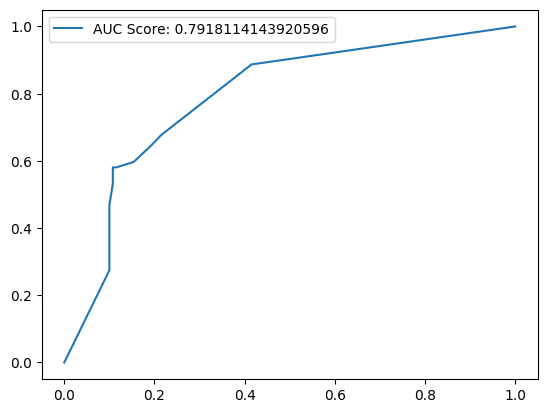

In [16]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# dataset load
data = pd.read_csv("datasets/diabetes2.csv")

# data prepare
X = data.drop('Outcome', axis='columns')
y = data['Outcome'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
data.describe()


# model create
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

# model train
model.fit(X_train, y_train)

# model predict
y_pred = model.predict(X_test)

# evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", acc)
print("Classification report: \n", report)
print("Confusion matrix: \n", matrix)

# plot
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC Score: {auc}")
plt.legend()
plt.show()

### Visualization

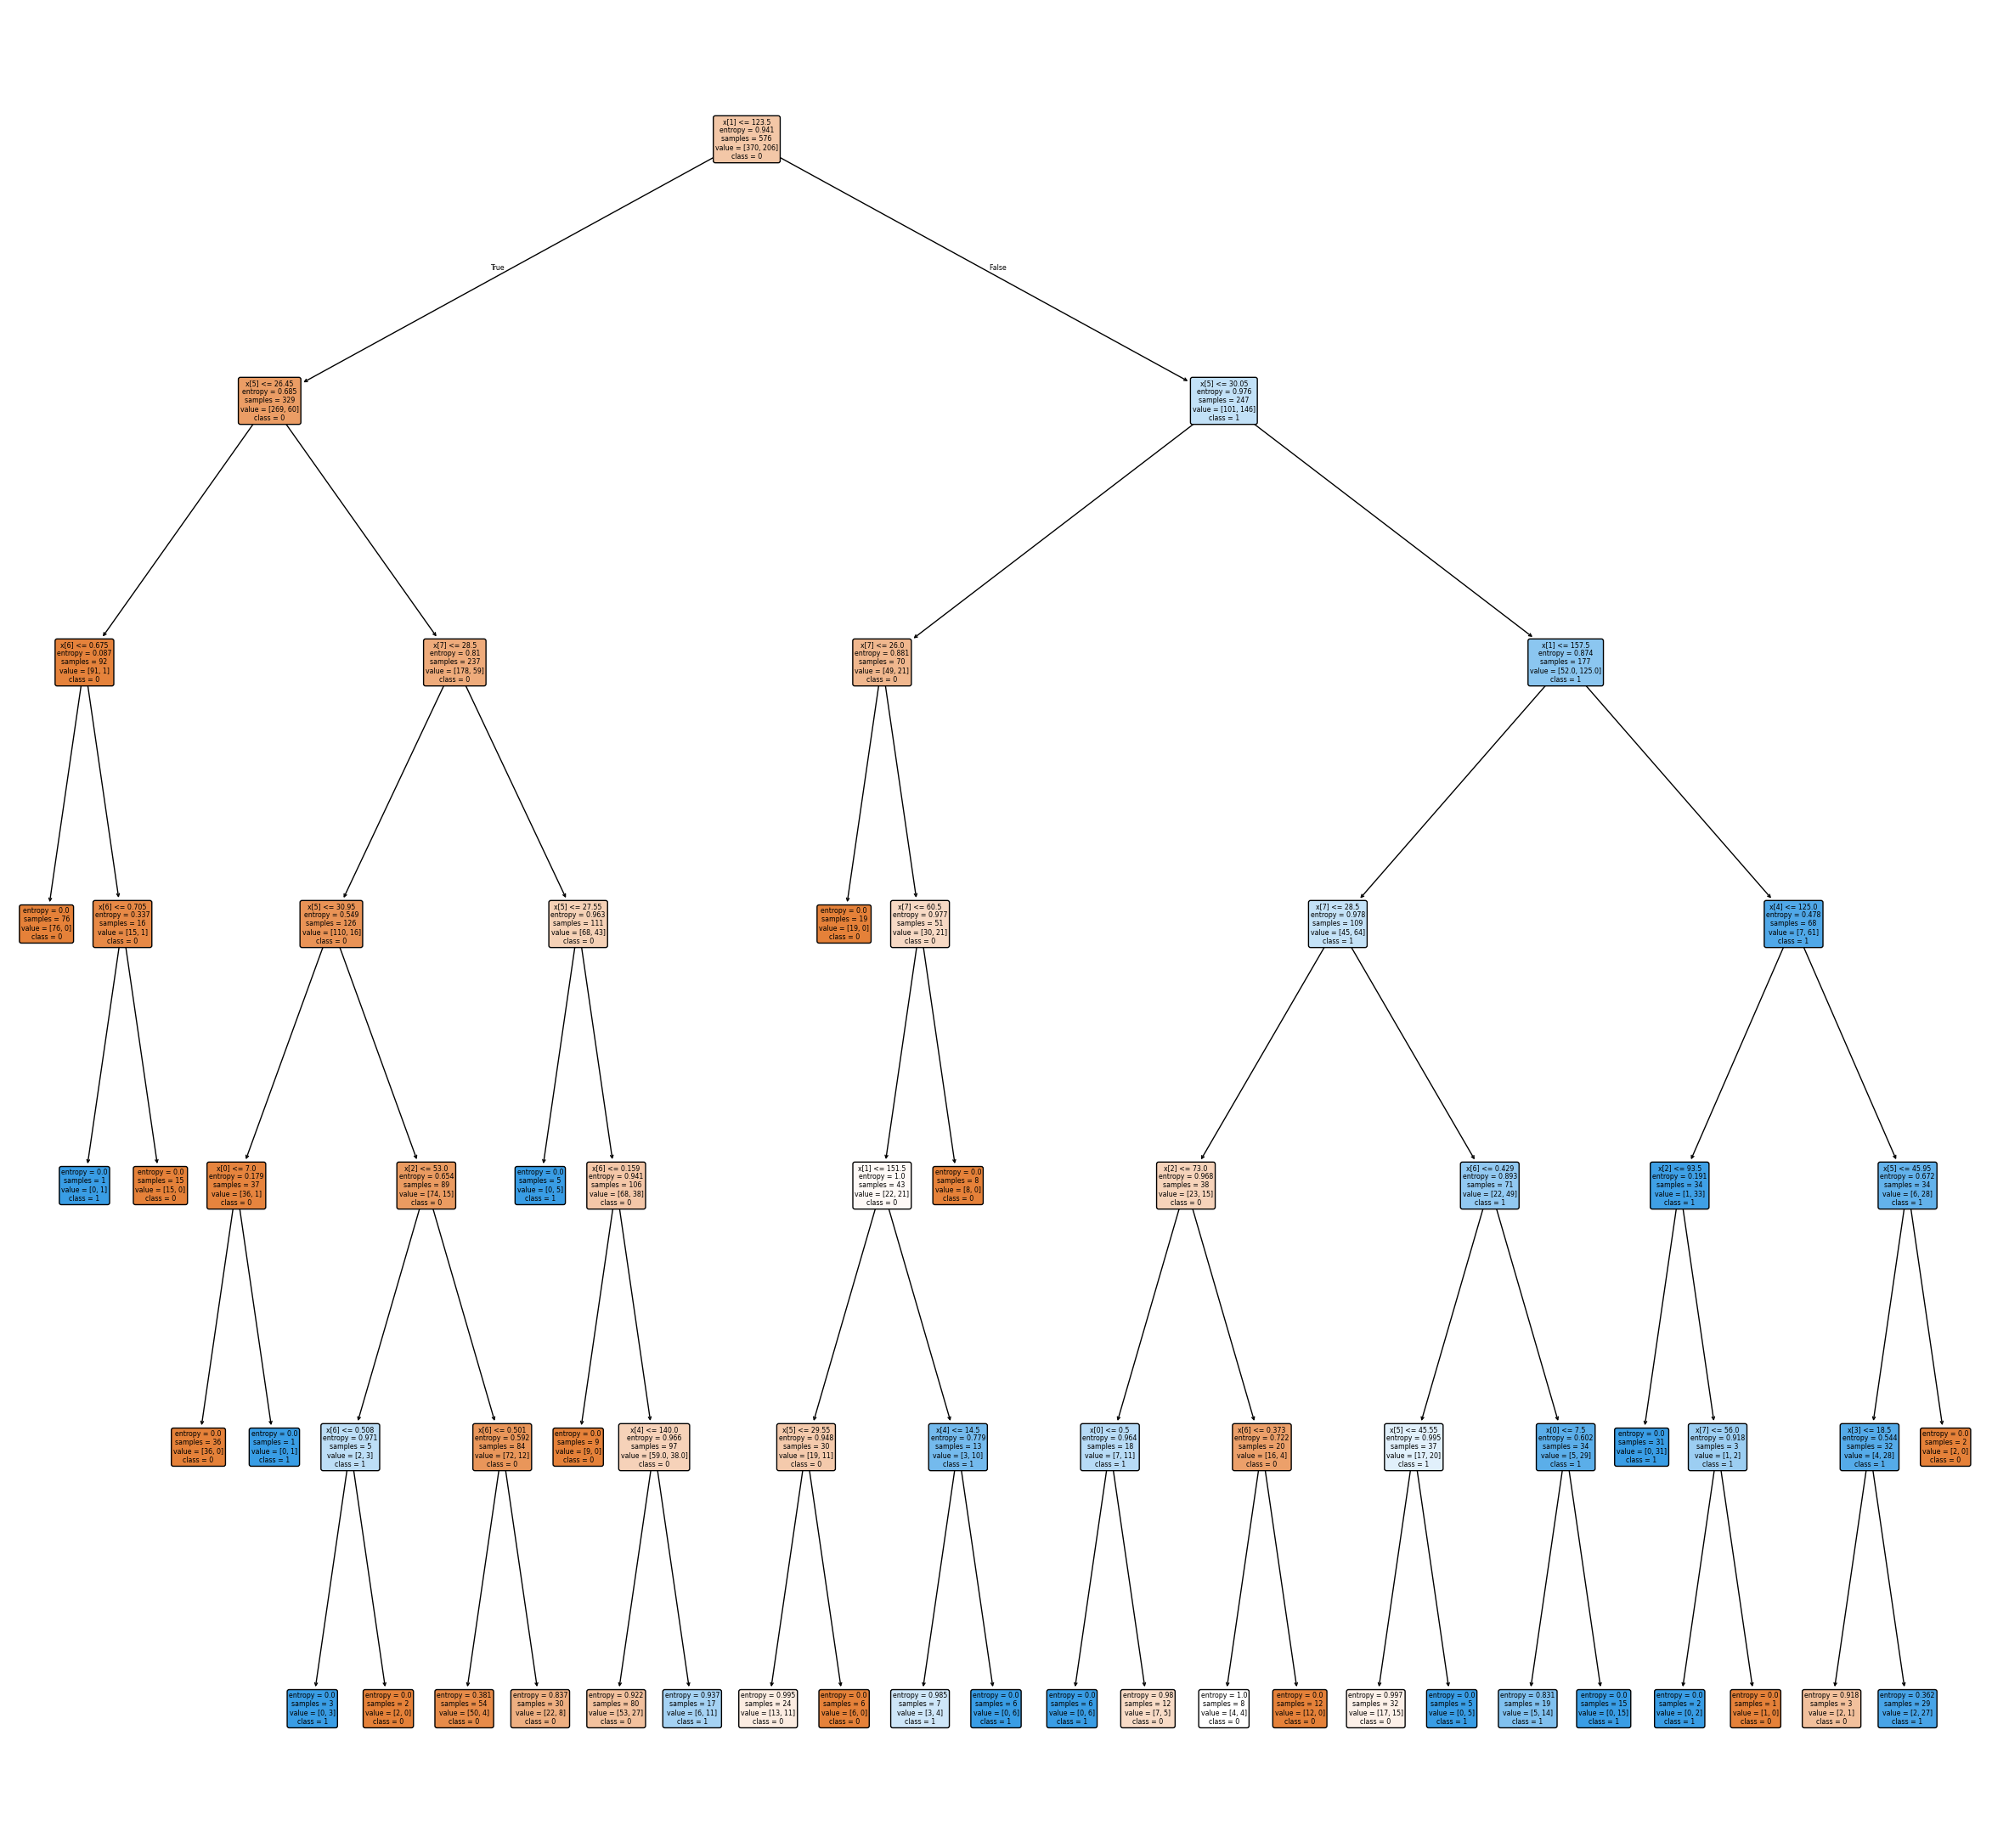

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,28))
plot_tree(model, filled=True, rounded=True, feature_names=None, class_names=['0', '1'])
plt.show()